# lab-3.01-probability


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
from scipy.stats import norm

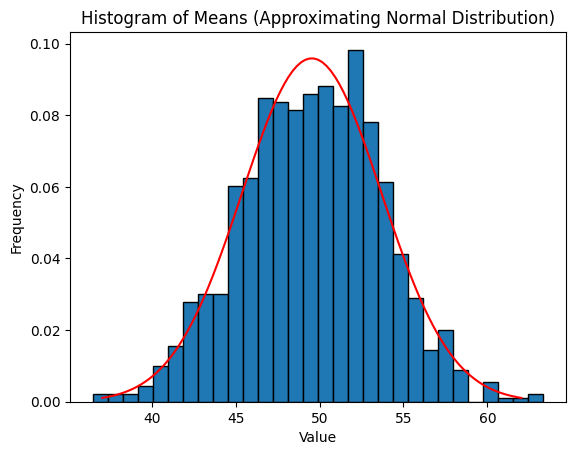

In [2]:

arr = pd.DataFrame(columns=['test'])
arr2 = pd.DataFrame(columns=['test'])

for i in range(0, 1000): 
    arr = pd.DataFrame(columns=['test'])
    for x in range(0, 50):
        arr.loc[x] = {'test': np.random.randint(100)}
 
    m = np.mean(arr['test'])
     

    arr2.loc[i] = {'test': m}
 
arr2.head()

# sns.histplot(data=arr2, x='test', bins=30, kde=True)   

# Plot the histogram of the means
plt.hist(arr2, bins=30, edgecolor='k', density=True)
plt.title('Histogram of Means (Approximating Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Overlay the normal distribution curve
mu, sigma = np.mean(arr2['test']), np.std(arr2['test'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='r')
plt.show() 


 


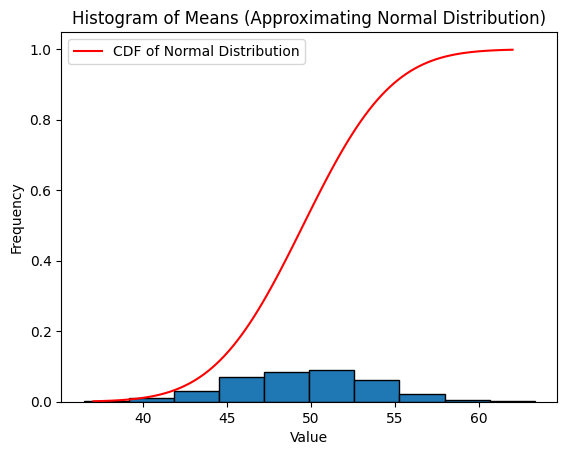

In [3]:
# Plot the histogram of the means
plt.hist(arr2, bins=10, edgecolor='k', density=True)
plt.title('Histogram of Means (Approximating Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate the mean and standard deviation of the data
mu, sigma = np.mean(arr2['test']), np.std(arr2['test'])

# Overlay the cumulative distribution function (CDF) of the normal distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) 
plt.plot(x, norm.cdf(x, mu, sigma), color='r', label='CDF of Normal Distribution')

# Add legend and show plot
plt.legend()
plt.show()

## Exercise 1 - Reliability of backups

A hard drive has a 1% probability to crash. Therefore, we take two backups, each having a 2% probability to crash. The three components work independently of each other. Data is lost only when all three components crash.

Question: what is the probability that the data is not lost?

In [4]:
print(1 - (0.01 * 0.02))

0.9998


### Exercise 2

_X_ is the number of broken eggs in a random carton of 12 eggs. The probability distribution of _X_ is as follows  

| | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- |
| _X_ | 0 | 1 | 2 | 3 | 4 |
| _P(X)_ | 0.65 | 0.20 | 0.10 | 0.04 | ? |

1. Only 0, 1, 2, 3 and 4 have probabilities > 0. What is the value for _P(4)_?
2. What is the probability that a carton of 12 eggs has a maximum of 2 broken eggs?
3. What is the probability that a carton of 12 eggs has at least 9 unbroken eggs?
4. What is the probability that a carton of 12 eggs has exactly 9 unbroken eggs?
5. A palette of 800 cartons of 12 eggs will have approximately how many broken eggs?



In [5]:
df = pd.DataFrame(columns=['P', 'X'])
df.loc[0] = {'P': .65, 'X': 0}
df.loc[1] = {'P': .2, 'X': 1}
df.loc[2] = {'P': .1, 'X': 2}
df.loc[3] = {'P': .04, 'X': 3}
df.loc[4] = {'P': .01, 'X': 4}
df.head()
# print(f"{1 - (0.65+0.2+0.1+0.04):.2f}")
print(df.query('X <= 2')['P'].sum())
print(df.query('X <= 3')['P'].sum())
print(df.query('X == 3')['P'].sum())

print (800 * (df['P'] * df['X']).sum() )
print(0.2 + (2*0.1) + (3*0.04) + (4*0.01))
print((800 * (df['P'] * df['X']).sum()) / (12 * 800))


0.9500000000000001
0.9900000000000001
0.04
448.00000000000006
0.56
0.046666666666666676


### Exercise 3

There are two traffic lights on the route a given individual takes to go from his home to work.  
E = the event that the individual has to stop at the first light  
F = the event that the individual has to stop at the second light

$P(E)$ = 0.4  
$P(F)$ = 0.3  
$P(E ∩ F)$ = 0.15  

1. Are E and F independent events? Briefly explain why or why not?
2. What is the probability that the individual has to stop at at least one of the lights?
3. What is the probability that the individual should stop at neither light?
4. What is the probability that the individual has to stop at least at the first light?
5. What is the probability that the individual has to stop at exactly one of the lights?
6. What is the probability that the individual has to stop at only the first light?


In [6]:
E = 0.4
F = 0.3
E_F = 0.15

print(E*F != E_F) # dependent because E * F != EnF
print(E + F - E_F)
print(1 - (E + F - E_F))
print(E - E_F + E_F)
print((E - E_F) + (F - E_F))
print(E - E_F)



True
0.5499999999999999
0.45000000000000007
0.4
0.4
0.25


## Exercise 4

A box contains five pieces of paper marked €1, €1, €1, €10 and €25.  
A player chooses two pieces of paper and then wins the larger of the amounts on the two pieces of paper.  
Define a discrete random variable _X_ with _X_ = amount won.  
1. Determine the discrete probability distribution of this game
- $P(X = 1) = ?$
- $P(X = 10) = ?$
- $P(X = 25) = ?$
2. In *Prob_X* below, replace [0.1, 0.3, 0.5] with the values found for a graphical representation of the discrete probability distribution.  
3. Calculate the expectation value (expectation) of the random variable _X_.  


(Hint: consider the pieces of paper as numbered 1, 2, 3, 4 and 5.)


<Axes: >

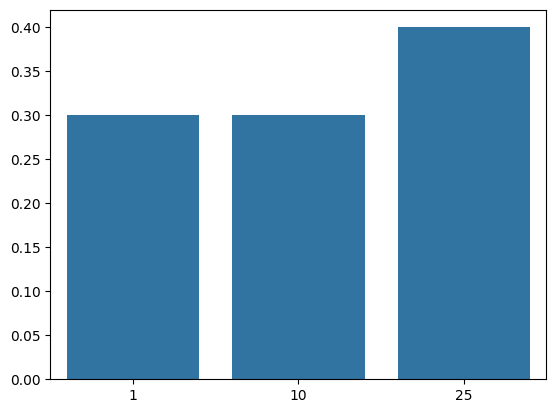

In [7]:
X = [1, 10, 25]           # Possible outcomes. Leave unchanged!!!
Prob_X =  [0.3, 0.3, 0.4]  # Replace with your own found values!!!
sns.barplot(x = X, y = Prob_X) # Visual representation. Leave unchanged!!!
# combinations keep largest = 1,1 1,10 1,25 10,25
 

### Exercise 5
John participates in an online game of chance. He can win EUR 1, EUR 2, EUR 3, EUR 4 or EUR 5. The probability of winning X EUR is directly proportional to the amount to be won, in other words  
$p(x) = k * x $ for x = 1, ... , 5
1. What is the value for k?
2. What is the probability of winning a maximum of EUR 3?
3. Suppose Jan participates in the game of chance 100 times. Approximately how much will he then win?

In [8]:
print(1/15, 2/15, 3/15, 4/15, 5/15)
print(1/15 + 2/15 + 3/15)
print((1 * (1/15)) + (2 * (2/15)) + (3 * (3/15)) + ( 4 * (4/15)) + (5 * ( 5/15)))

print(100 * 3.666666)

0.06666666666666667 0.13333333333333333 0.2 0.26666666666666666 0.3333333333333333
0.4
3.6666666666666665
366.6666


### Exercise 6 - Probabilities for normal distributions

Calculate the given probabilities in the standard normal distribution $Z \sim Nor(\mu=0, \sigma=1)$. Compare your solutions with the given answers.

|     | Calculate the following probabilities:             | Answer: |
| :-- | :--------------------- | :------ |
| 1.  | $P(Z < 1.33)$          | 0.908   |
| 2.  | $P(Z > 1.33)$          | 0.092   |
| 3.  | $P(Z < −1.33)$         | 0.092   |
| 4.  | $P(Z > −1.33)$         | 0.908   |
| 5.  | $P(Z < 0.45)$          | 0.674   |
| 6.  | $P(Z > −1.05)$         | 0.853   |
| 7.  | $P(Z < 0.65)$          | 0.742   |
| 8.  | $P(−0.45 < Z < 1.20)$  | 0.559   |
| 9.  | $P(−1.35 < Z < −0.10)$ | 0.372   |
| 10. | $P(−2.10 < Z < −0.90)$ | 0.166   |

In [9]:
m = 0
s = 1

print(stats.norm.cdf(1.33, m, s))
print(stats.norm.sf(1.33, m, s))

print(stats.norm.cdf(1.2, m, s) - stats.norm.cdf(-0.45, m, s))
 



0.9082408643497193
0.09175913565028077
0.5585751094903718


### Exercise 7 - Plot probability density
Make a graphical plot of the probability density function and the cumulative distribution function of a normal distribution with $\mu = 2.5$ and $\sigma = 1.5$.

What is the area under the density function between  x=0.5  and  x=4 . (Answer = 0.750)

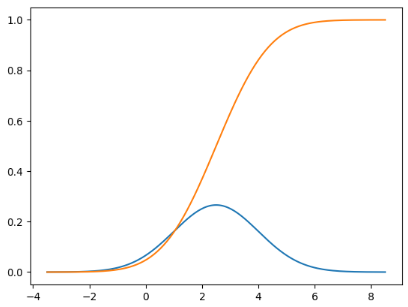

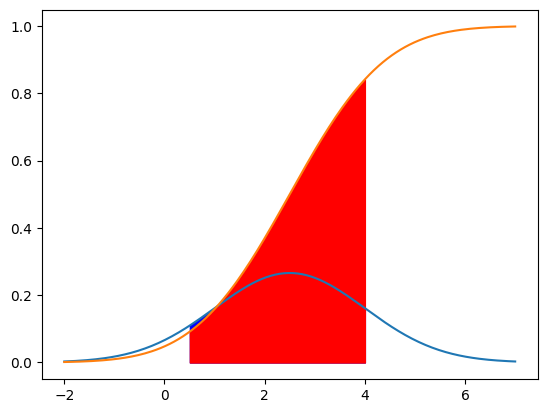

In [44]:
m = 2.5
s = 1.5

x_axis = np.linspace(m - s * 3 , m + s * 3 , 202)
y_axis = np.linspace(m - s * 3 , m + s * 3, 202)

x = stats.norm.pdf(x_axis, m, s)
y = stats.norm.cdf(y_axis, m, s)
plt.plot(x_axis, x)
plt.plot(y_axis, y)

plt.fill_between(x_axis, 0, x ,where=(x_axis >= 0.5) & (x_axis <=4) , color='b')
plt.fill_between(y_axis, 0, y ,where=(y_axis >= 0.5) & (y_axis <=4) , color='r')
# dist_x, 0, dist_y, where=dist_x <= x, color='lightblue')
plt.show()



### Exercise 8 - Theoretical vs real probability density
Generate 25 random numbers distributed according to the standard normal distribution. Plot a histogram with probability density function and the theoretical probability density.
Do the same for 250 and 2500 numbers.
Notice how the real probability density approaches the theoretical one as the sample size increases.

[10.64, 13.76, 14.64, 16.28, 12.28, 14.2, 18.0, 16.48, 14.2, 15.76, 14.52, 15.4, 19.08, 15.12, 14.32, 15.12, 15.08, 15.28, 14.88, 14.6, 15.24, 16.08, 14.52, 14.44, 18.76]


<Axes: ylabel='Count'>

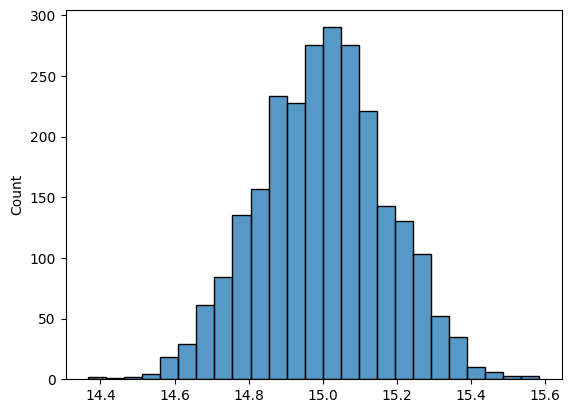

In [11]:

df = pd.DataFrame(index=['25', '250', '2500'], columns=['P'])
 
df.loc['25', 'P'] = [np.random.randint(1, 30, size=25).mean() for _ in range(25)]
df.loc['250', 'P'] = [np.random.randint(1, 30, size=250).mean() for _ in range(250)]
df.loc['2500', 'P'] = [np.random.randint(1, 30, size=2500).mean() for _ in range(2500)]

print(df.loc['25','P'])

sns.histplot(df['P']['2500'], bins=25)


### Exercise 9

Suppose that the distribution of net typing speed in
words per minute (wpm) for experienced typists can be
approximated by a normal curve with mean 60 wpm and
standard deviation 15 wpm
1. What is the probability that the net typing speed of a randomly selected typist
is at most 60 wpm?
2. What is the probability that the net speed of a randomly selected typist's
net speed is between 45 and 90 wpm?
3. Would you be surprised to find a typist
whose net speed is higher than 105 wpm?
4. Suppose special training will be given to the slowest 20% of typists. Which typing speeds would qualify for this training?

In [27]:
m = 60
s = 15

print(stats.norm.sf(60, m, s))
print(stats.norm.cdf(90, m, s) - stats.norm.cdf(45, m, s))
print(stats.norm.cdf(105, m, s))
print(stats.norm.ppf(0.2, m, s))

0.5
0.8185946141203637
0.9986501019683699
47.37568149640629


## Exercise 10

Consider the two games of chance mentioned in the slides:

- Bet on: at least one six when throwing a fair die 4 consecutive times.
- Bet on: at least one "double six" when throwing two fair dice 24 times.

Question: calculate the exact probability of winning each of these two games. Compare your answer with the long-term frequency of winning shown in the slides.

In [41]:
print(1 - ((5/6) ** 4))

print((1/6*1/6) * 24)

print(((1/6*1/6) * 24) * (1/6 + 1/6 + 1/6 + 1/6))



0.0007716049382716049
0.5177469135802468
0.6666666666666666
0.4444444444444444


## Exercise 11 - Expectation of $X-a$

Consider the probability distribution of the random variable $X$ giving the sum of the eyes when throwing two dice.

- This probability distribution is symmetric around 7. Verify (by using the definition of expectation) that the expectation of $X$ is also 7.

- Suppose that you have to pay €8 to play a game where your earnings are the sum of the eyes when throwing two dice. Denote your profit (or loss) by $Y$. What is the relationship between $Y$ and $X$? Give the expectation of $Y$. What is the relationship with the expectation of $X$?

- Can you see a general relationship between the expectation of $X − a$ and that of $X$, where $a$ is a real number?

In [42]:
# Define the possible outcomes of throwing two dice
outcomes = range(2, 13)

# Calculate the expectation of X
expectation_X = sum(outcomes) / len(outcomes)

# Print the expectation of X
print("Expectation of X:", expectation_X)

# Calculate the expectation of Y
fixed_cost = 8
expectation_Y = expectation_X - fixed_cost

# Print the expectation of Y
print("Expectation of Y:", expectation_Y)

# Calculate the expectation of X - a
a = 5  # Example value of a
expectation_X_minus_a = expectation_X - a

# Print the expectation of X - a
print("Expectation of X - a:", expectation_X_minus_a)


Expectation of X: 7.0
Expectation of Y: -1.0
Expectation of X - a: 2.0


## Exercise 12 - Variance of $X/a$

Consider the probability distribution of the random variable $X$ giving the sum of the eyes when throwing two dice.

- Calculate the variance of $X$.

- Suppose the profit you make is only half of the sum of the eyes when throwing two dice. Denote your profit (or loss) by $Y$. What is the relationship between $Y$ and $X$? Give the variance of $Y$. What is the relationship with the variance of $X$?

- Can you see a general relationship between the variance of $X/a$ and that of $X$, where $a$ is a real non-zero number?

## Exercise 13 - Expectation and variance of $(X−\mu)/\sigma$)

Using the information from the two previous exercises, determine the expectation and variance for a random variable $Z$ given by

$Z = \frac{X-\mu_X}{\sigma_X}$